# Image is being loaded from the Google Drive and Printed along with its size.

A sample file name: emotionet_5_third_50000_134617.jpg
Shape information of two arbitrary images: (400, 400, 3) - this one is shown below, and (400, 400, 3)


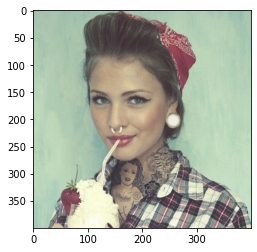

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 
!pip3 install opencv-python
# this package should be installed: was also required in the previous week's materials (look in that notebook for the install command)
                    # assuming this is installed by now, otherwise inside a cell type: !pip install opencv-python
import matplotlib.pyplot as plt


dir_struct = '/content/drive/MyDrive/001142694/vol/deform/dk15/attribute_db/emotionet_5/third_50000/'
file_lst = listdir(dir_struct) # it will return all the image file names as a list
print('A sample file name: {}'.format(file_lst[1]))

# Change color to RGB from OpenCV's BGR format since this library uses BGR format [rather than RGB] for historical purposes
# an interesting perspective on why OpenCV uses BGR : https://learnopencv.com/why-does-opencv-use-bgr-color-format/
image = cv2.imread(dir_struct+file_lst[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct+file_lst[1]).shape))
plt.imshow(image)

# Processing the output by converting into list where the order is wrinkles, freakles, glasses, hair color, hair top, no face shown or not human.

In [ ]:
## put here the full path of the generated file of the annotation tool, e.g.: /Users/jim/Desktop/AU_video.txt
file_name = '/content/drive/MyDrive/AU_video_New.txt'
with open(file_name) as fil:
 content = fil.readlines()

outputs = []

for elem in content:
 if 'N/A' in elem:
   continue
 else:
   line = elem.split(',')
   outputs.append([int(line[1]),int(line[3]),int(line[5]),int(line[7]),int(line[9]),int(line[11])])

print(outputs)
# always the outputs correspond to (in that order): wrinkles, freakles, glasses, hair color, hair top, no face shown or not human
     


[[0, 0, 1, 0, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 1, 2, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 2, 1, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0], [1, 0, 0, 2, 1, 0], [1, 0, 1, 8, 3, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 8, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 2, 0], [0, 0, 0, 2, 2, 0], [0, 0, 0, 8, 2, 0], [0, 0, 0, 6, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 8, 2, 0], [1, 0, 0, 8, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 3, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 1, 3, 0], [1, 0, 0, 6, 2, 0], [1, 0, 0, 8, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 1, 0], [1, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [1, 0, 0, 5, 2, 0], [1, 0, 0, 1, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 3, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 2, 0],

# Segmenting the attributes as per values and file name.

In [ ]:
Image_Files = '/content/drive/MyDrive/001142694/vol/deform/dk15/attribute_db/emotionet_5/third_50000'
Attributes = ['Wrinkles','Freakles','Glasses','HairColor','HairTop','NotHuman']
df = pd.DataFrame(outputs,columns=Attributes)
df.insert(0,'Image_Files',Image_Files,True)
df.to_csv('/content/drive/MyDrive/AU_video_New.csv',index= False)



In [ ]:
df= pd.read_csv('/content/drive/MyDrive/AU_video_New.csv')
df


,Image_Files,Wrinkles,Freakles,Glasses,HairColor,HairTop,NotHuman
0,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,1,0,2,0
1,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,0,2,0
2,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,8,3,0
3,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,1,2,0
4,/content/drive/MyDrive/001142694/vol/deform/dk...,1,0,0,0,1,0
...,...,...,...,...,...,...,...
3993,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,8,0,0
3994,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,1,2,0
3995,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,0,0,3,0
3996,/content/drive/MyDrive/001142694/vol/deform/dk...,0,0,1,0,2,0


# Converting the feature data into numpy array so that it can be used for training.

In [ ]:
Wrinkles1 = np.array(df["Wrinkles"])
Freakles1 = np.array(df["Freakles"])
Glasses1 = np.array(df["Glasses"])
HairColor1 = np.array(df["HairColor"])
HairTop1 = np.array(df["HairTop"])
NotHuman1 = np.array(df["NotHuman"])
print(Wrinkles1)
print(HairColor1)


[0 0 0 ... 0 0 0]
[0 0 8 ... 0 0 8]


# Wrinkle has two classes and class_nameWrinkle has been created

In [ ]:

class_namesWrinkle = [' No Wrinkles','Has Wrinkles']
# creating the random labels for the each filename
labels = []
for i in range(len(file_lst)):
    labels.append(np.random.randint(len(class_namesWrinkle))) # will return a random integer between [0, 9] - not including 9

# # saving the annotation file where the labels are randomly created
data = pd.DataFrame({'filename': file_lst, 'labels': labels}, columns=['filename', 'labels'])
print(data)
data.to_csv('/content/drive/MyDrive/AU_video_New.csv', index=False)

                                 filename  labels
0      emotionet_5_third_50000_134619.jpg       1
1      emotionet_5_third_50000_134617.jpg       1
2      emotionet_5_third_50000_134674.jpg       1
3      emotionet_5_third_50000_134673.jpg       0
4      emotionet_5_third_50000_134733.jpg       1
...                                   ...     ...
3993   emotionet_5_third_50000_113131.jpg       1
3994   emotionet_5_third_50000_113192.jpg       0
3995   emotionet_5_third_50000_113195.jpg       0
3996   emotionet_5_third_50000_113221.jpg       1
3997  emotionet_5_fourth_50000_159587.jpg       1

[3998 rows x 2 columns]


# Freakle has two classes and class_nameFreakle has been created.

In [ ]:
class_namesFreakles = [' No Freakles','Has Freakles']
# creating the random labels for the each filename
labels = []
for i in range(len(file_lst)):
    labels.append(np.random.randint(len(class_namesFreakles))) # will return a random integer between [0, 9] - not including 9

# # saving the annotation file where the labels are randomly created
data = pd.DataFrame({'filename': file_lst, 'labels': labels}, columns=['filename', 'labels'])
print(data)
data.to_csv('/content/drive/MyDrive/AU_video_New.csv', index=False)

                                 filename  labels
0      emotionet_5_third_50000_134619.jpg       1
1      emotionet_5_third_50000_134617.jpg       0
2      emotionet_5_third_50000_134674.jpg       1
3      emotionet_5_third_50000_134673.jpg       1
4      emotionet_5_third_50000_134733.jpg       1
...                                   ...     ...
3993   emotionet_5_third_50000_113131.jpg       0
3994   emotionet_5_third_50000_113192.jpg       1
3995   emotionet_5_third_50000_113195.jpg       1
3996   emotionet_5_third_50000_113221.jpg       0
3997  emotionet_5_fourth_50000_159587.jpg       0

[3998 rows x 2 columns]


# Glass has three classes and class_nameGlasses has been created.

In [ ]:
class_namesGlasses = [' No Glass','Has Normal Glass','Has Sunglass']
# creating the random labels for the each filename
labels = []
for i in range(len(file_lst)):
    labels.append(np.random.randint(len(class_namesGlasses))) # will return a random integer between [0, 9] - not including 9

# # saving the annotation file where the labels are randomly created
data = pd.DataFrame({'filename': file_lst, 'labels': labels}, columns=['filename', 'labels'])
print(data)
data.to_csv('/content/drive/MyDrive/AU_video_New.csv', index=False)

                                 filename  labels
0      emotionet_5_third_50000_134619.jpg       2
1      emotionet_5_third_50000_134617.jpg       0
2      emotionet_5_third_50000_134674.jpg       0
3      emotionet_5_third_50000_134673.jpg       0
4      emotionet_5_third_50000_134733.jpg       1
...                                   ...     ...
3993   emotionet_5_third_50000_113131.jpg       0
3994   emotionet_5_third_50000_113192.jpg       1
3995   emotionet_5_third_50000_113195.jpg       1
3996   emotionet_5_third_50000_113221.jpg       0
3997  emotionet_5_fourth_50000_159587.jpg       1

[3998 rows x 2 columns]


# Hair color has 8 classes and class_nameGlasses has been created.


In [ ]:
class_namesHairColor = ['Brown','Black','Gray','Blond','Red','White','Mixed','Other','Not Visible']

# creating the random labels for the each filename
labels = []
for i in range(len(file_lst)):
    labels.append(np.random.randint(len(class_namesHairColor))) # will return a random integer between [0, 9] - not including 9

# # saving the annotation file where the labels are randomly created
data = pd.DataFrame({'filename': file_lst, 'labels': labels}, columns=['filename', 'labels'])
print(data)
data.to_csv('/content/drive/MyDrive/AU_video_New.csv', index=False)

                                 filename  labels
0      emotionet_5_third_50000_134619.jpg       2
1      emotionet_5_third_50000_134617.jpg       1
2      emotionet_5_third_50000_134674.jpg       0
3      emotionet_5_third_50000_134673.jpg       7
4      emotionet_5_third_50000_134733.jpg       3
...                                   ...     ...
3993   emotionet_5_third_50000_113131.jpg       8
3994   emotionet_5_third_50000_113192.jpg       8
3995   emotionet_5_third_50000_113195.jpg       6
3996   emotionet_5_third_50000_113221.jpg       5
3997  emotionet_5_fourth_50000_159587.jpg       7

[3998 rows x 2 columns]


# Hair top has four classes and class_nameHairTop has been created.


In [ ]:
class_namesHairTop = ['Bald or Shaved','Has few hairs','Has thick hair','Not Visible']
# creating the random labels for the each filename
labels = []
for i in range(len(file_lst)):
    labels.append(np.random.randint(len(class_namesHairTop))) # will return a random integer between [0, 9] - not including 9

# # saving the annotation file where the labels are randomly created
data = pd.DataFrame({'filename': file_lst, 'labels': labels}, columns=['filename', 'labels'])
print(data)
data.to_csv('/content/drive/MyDrive/AU_video_New.csv', index=False)

                                 filename  labels
0      emotionet_5_third_50000_134619.jpg       3
1      emotionet_5_third_50000_134617.jpg       2
2      emotionet_5_third_50000_134674.jpg       3
3      emotionet_5_third_50000_134673.jpg       3
4      emotionet_5_third_50000_134733.jpg       1
...                                   ...     ...
3993   emotionet_5_third_50000_113131.jpg       2
3994   emotionet_5_third_50000_113192.jpg       1
3995   emotionet_5_third_50000_113195.jpg       1
3996   emotionet_5_third_50000_113221.jpg       0
3997  emotionet_5_fourth_50000_159587.jpg       0

[3998 rows x 2 columns]


# The image has been resized in order to apply to the algorithm and I found this to give a good size to use.

In [ ]:
 data  = pd.read_csv('/content/drive/MyDrive/AU_video_New.csv')
image_lst = [] # this list will hold all the images

for i in range(data.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+ data.iloc[i]['filename'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA) 
    image_lst.append(image) # appending the read image to a list

,filename,labels,image
0,emotionet_5_third_50000_134619.jpg,3,"[[[87, 116, 97], [84, 110, 88], [76, 105, 85],..."
1,emotionet_5_third_50000_134617.jpg,2,"[[[161, 193, 174], [162, 194, 174], [163, 194,..."


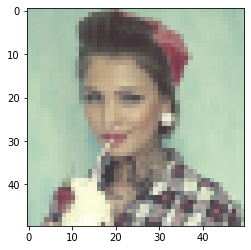

In [ ]:

data['image'] = image_lst # creating a new column that holds all the images
# showing the same image that we have displayed before
# see the change because of resizing
plt.imshow(data.iloc[1]['image'])
data.head(2)

Spliting the dataset to test and train so that it can be feed to the model.

In [ ]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set
X_trainWrinkle, X_testWrinkle, y_trainWrinkle, y_testWrinkle = train_test_split(image_lst, Wrinkles1 , test_size=0.2, stratify=Wrinkles1, random_state=42)

# Normalizing the dataset to give value between 0 and 1.

In [ ]:
X_trainWrinkle = np.array(X_trainWrinkle)/255.0
X_testWrinkle = np.array(X_testWrinkle)/255.0

In [ ]:
X_trainWrinkle

array([[[[0.56470588, 0.7372549 , 0.70980392],
         [0.56078431, 0.74901961, 0.70588235],
         [0.56862745, 0.74901961, 0.72941176],
         ...,
         [0.68235294, 0.78431373, 0.73333333],
         [0.67843137, 0.78823529, 0.7254902 ],
         [0.67058824, 0.79607843, 0.73333333]],

        [[0.59215686, 0.76078431, 0.76078431],
         [0.6       , 0.76862745, 0.76470588],
         [0.59215686, 0.76470588, 0.78039216],
         ...,
         [0.67843137, 0.78823529, 0.74509804],
         [0.68235294, 0.78823529, 0.74509804],
         [0.67843137, 0.79607843, 0.74901961]],

        [[0.65098039, 0.8       , 0.79215686],
         [0.62745098, 0.79607843, 0.79607843],
         [0.61568627, 0.8       , 0.80392157],
         ...,
         [0.6745098 , 0.79215686, 0.75686275],
         [0.67843137, 0.79607843, 0.76862745],
         [0.6745098 , 0.80392157, 0.76862745]],

        ...,

        [[0.21176471, 0.06666667, 0.05882353],
         [0.20784314, 0.04313725, 0.06666667]

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

# VGG16 Model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
modelVGG16 = VGG16(include_top=False, weights="imagenet", input_shape=(50, 50, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(modelVGG16.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
outputWrinkle = layers.Dense(2, activation='softmax')(fc2)
outputFreakle = layers.Dense(2, activation='softmax')(fc2)
outputGlass = layers.Dense(3, activation='softmax')(fc2)
outputHairColor = layers.Dense(8, activation='softmax')(fc2)
outputHairTop = layers.Dense(4, activation='softmax')(fc2)
# define new model
modelVGG16Wrinkle = Model(inputs=modelVGG16.inputs, outputs=outputWrinkle)
modelVGG16Freakle = Model(inputs=modelVGG16.inputs, outputs=outputFreakle)
modelVGG16Glass = Model(inputs=modelVGG16.inputs, outputs=outputGlass)
modelVGG16HairColor = Model(inputs=modelVGG16.inputs, outputs=outputHairColor)
modelVGG16HairTop = Model(inputs=modelVGG16.inputs, outputs=outputHairTop)

modelVGG16Wrinkle.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelVGG16Freakle.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelVGG16Glass.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelVGG16HairColor.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelVGG16HairTop.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# modelVGG16.summary()

# ResNet50 Model

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

# load model without classifier layers
modelResNet = ResNet50(include_top=False, weights="imagenet", input_shape=(50, 50, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(modelResNet.layers[-1].output)
outputWrinkleRestnet = layers.Dense(2, activation='softmax')(flat1)
outputFreakleRestnet = layers.Dense(2, activation='softmax')(flat1)
outputGlassRestnet = layers.Dense(3, activation='softmax')(flat1)
outputHairColorRestnet = layers.Dense(8, activation='softmax')(flat1)
outputHairTopRestnet = layers.Dense(4, activation='softmax')(flat1)


# define new model
modelResNetWrinkle = Model(inputs=modelResNet.inputs, outputs=outputWrinkleRestnet)
modelResNetFreakle = Model(inputs=modelResNet.inputs, outputs=outputFreakleRestnet)
modelResNetGlass = Model(inputs=modelResNet.inputs, outputs=outputGlassRestnet)
modelResNetHairColor = Model(inputs=modelResNet.inputs, outputs=outputHairColorRestnet)
modelResNetHairTop = Model(inputs=modelResNet.inputs, outputs=outputHairTopRestnet)

modelResNetWrinkle.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelResNetFreakle.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelResNetGlass.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelResNetHairColor.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
modelResNetHairTop.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

94773248/94765736 [==============================] - 2s 0us/step


# Training attribute wrinkles with VGG16

---



Epoch 1/10
13/13 [==============================] - 46s 774ms/step - loss: 0.6093 - accuracy: 0.7034 - val_loss: 0.4787 - val_accuracy: 0.8200
Epoch 2/10
13/13 [==============================] - 5s 409ms/step - loss: 0.4684 - accuracy: 0.8237 - val_loss: 0.4784 - val_accuracy: 0.8200
Epoch 3/10
13/13 [==============================] - 5s 410ms/step - loss: 0.4741 - accuracy: 0.8207 - val_loss: 0.4717 - val_accuracy: 0.8200
Epoch 4/10
13/13 [==============================] - 5s 411ms/step - loss: 0.4562 - accuracy: 0.8309 - val_loss: 0.4737 - val_accuracy: 0.8200
Epoch 5/10
13/13 [==============================] - 5s 410ms/step - loss: 0.4771 - accuracy: 0.8177 - val_loss: 0.4719 - val_accuracy: 0.8200
Epoch 6/10
13/13 [==============================] - 5s 410ms/step - loss: 0.4867 - accuracy: 0.8103 - val_loss: 0.4732 - val_accuracy: 0.8200
Epoch 7/10
13/13 [==============================] - 5s 410ms/step - loss: 0.4737 - accuracy: 0.8202 - val_loss: 0.4726 - val_accuracy: 0.8200
Epoch

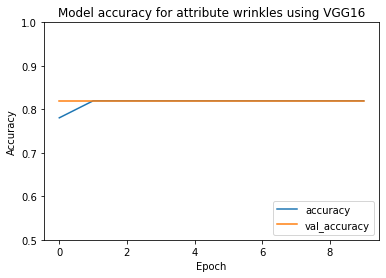

In [ ]:
# Training
history = modelVGG16Wrinkle.fit(X_trainWrinkle, y_trainWrinkle, epochs=10, batch_size=256,
                    validation_data=(X_testWrinkle, y_testWrinkle))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute wrinkles using VGG16")

test_loss, test_acc = modelVGG16Wrinkle.evaluate(X_testWrinkle,  y_testWrinkle, verbose=2)

print(test_acc)

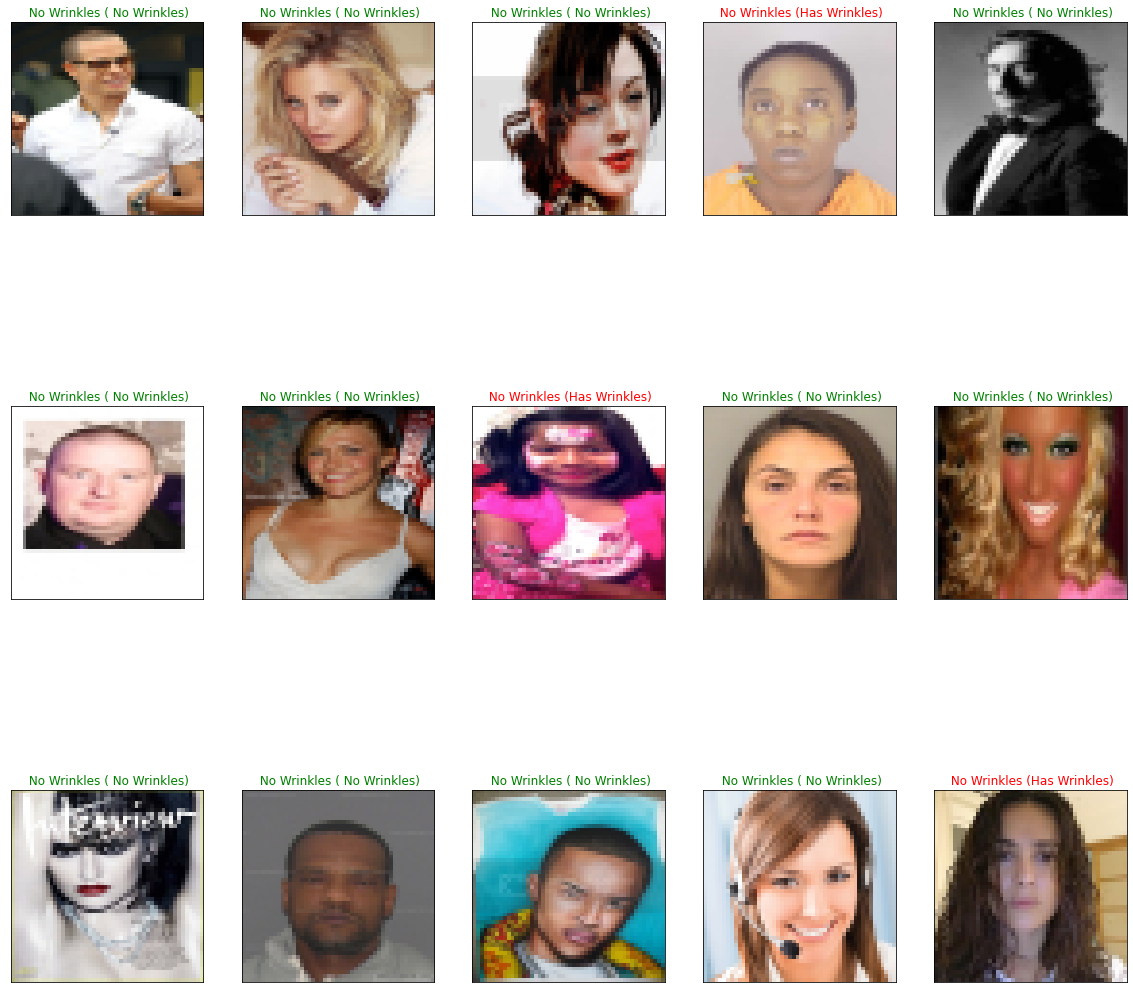

In [ ]:
import pdb
y_hat = modelVGG16Wrinkle.predict(X_testWrinkle)
# X_trainWrinkle, X_testWrinkle, y_trainWrinkle, y_testWrinkle
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testWrinkle.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testWrinkle[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_testWrinkle[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesWrinkle[predict_index], 
                                  class_namesWrinkle[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute wrinkles with Resnet50

Epoch 1/10
13/13 [==============================] - 19s 747ms/step - loss: 1.1564 - accuracy: 0.6694 - val_loss: 0.4777 - val_accuracy: 0.8200
Epoch 2/10
13/13 [==============================] - 6s 461ms/step - loss: 0.1731 - accuracy: 0.9443 - val_loss: 0.4739 - val_accuracy: 0.8200
Epoch 3/10
13/13 [==============================] - 6s 462ms/step - loss: 0.0381 - accuracy: 0.9936 - val_loss: 0.4810 - val_accuracy: 0.8200
Epoch 4/10
13/13 [==============================] - 6s 464ms/step - loss: 0.0146 - accuracy: 0.9996 - val_loss: 0.5160 - val_accuracy: 0.8200
Epoch 5/10
13/13 [==============================] - 6s 462ms/step - loss: 0.0072 - accuracy: 0.9995 - val_loss: 0.6851 - val_accuracy: 0.5550
Epoch 6/10
13/13 [==============================] - 6s 463ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.8260 - val_accuracy: 0.2062
Epoch 7/10
13/13 [==============================] - 6s 465ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.8866 - val_accuracy: 0.1988
Epoch

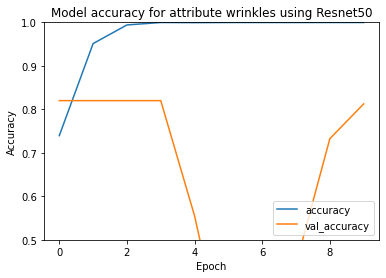

In [ ]:
# Training
history = modelResNetWrinkle.fit(X_trainWrinkle, y_trainWrinkle, epochs=10, batch_size=256,
                    validation_data=(X_testWrinkle, y_testWrinkle))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute wrinkles using Resnet50")

test_loss, test_acc = modelResNetWrinkle.evaluate(X_testWrinkle,  y_testWrinkle, verbose=2)

print(test_acc)

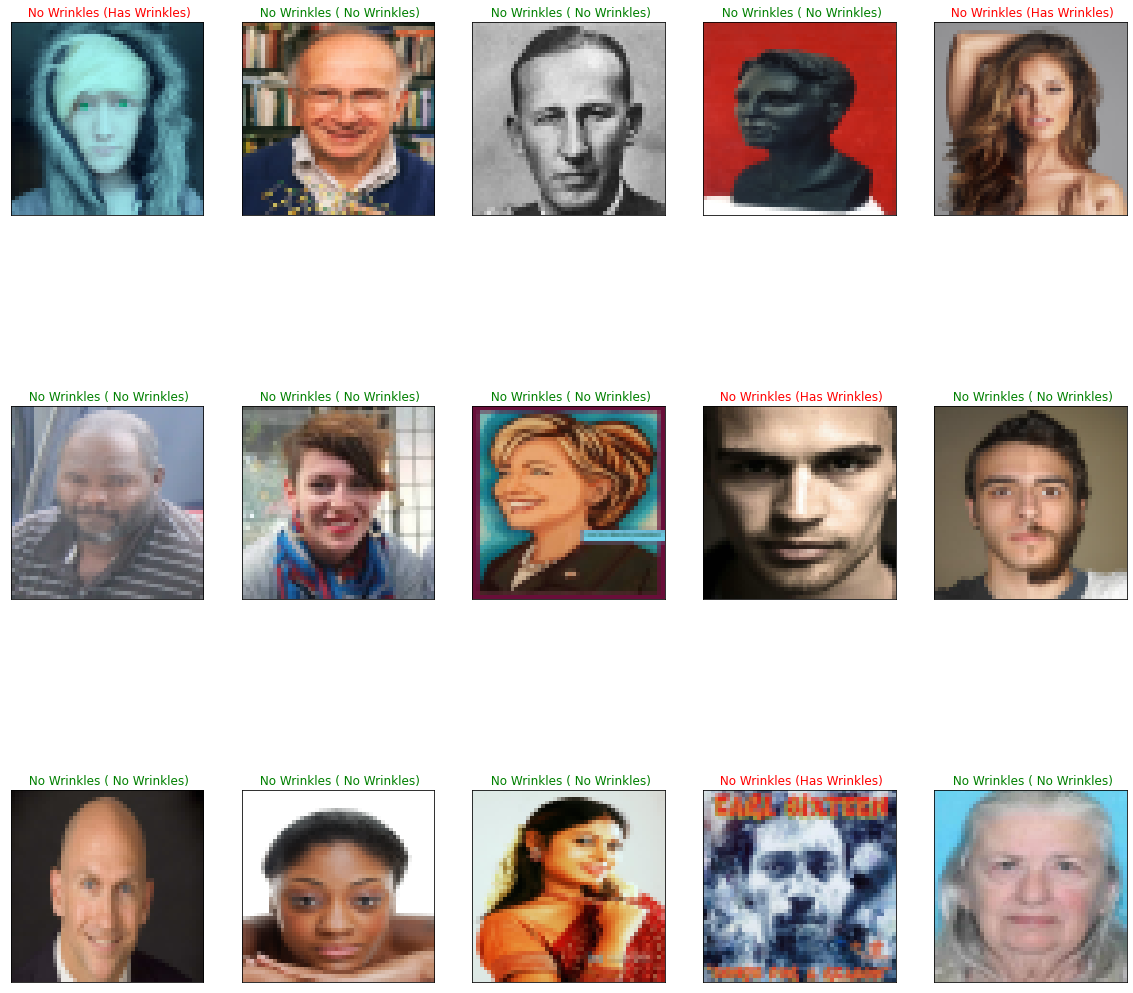

In [ ]:
import pdb
y_hat1 = modelResNetWrinkle.predict(X_testWrinkle)
# X_trainWrinkle, X_testWrinkle, y_trainWrinkle, y_testWrinkle
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testWrinkle.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testWrinkle[index]))
    predict_index = np.argmax(y_hat1[index])
    true_index = y_testWrinkle[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesWrinkle[predict_index], 
                                  class_namesWrinkle[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute Freakle with VGG16


In [ ]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set
X_trainFreakle, X_testFreakle, y_trainFreakle, y_testFreakle = train_test_split(image_lst, Freakles1 , test_size=0.2, stratify=Freakles1, random_state=42)

In [ ]:
X_trainFreakle = np.array(X_trainFreakle)/255.0
X_testFreakle = np.array(X_testFreakle)/255.0

Epoch 1/10
7/7 [==============================] - 24s 2s/step - loss: 0.3084 - accuracy: 0.9934 - val_loss: 0.0461 - val_accuracy: 0.9937
Epoch 2/10
7/7 [==============================] - 5s 711ms/step - loss: 0.0450 - accuracy: 0.9942 - val_loss: 0.0487 - val_accuracy: 0.9937
Epoch 3/10
7/7 [==============================] - 5s 710ms/step - loss: 0.0351 - accuracy: 0.9952 - val_loss: 0.0381 - val_accuracy: 0.9937
Epoch 4/10
7/7 [==============================] - 5s 710ms/step - loss: 0.0416 - accuracy: 0.9934 - val_loss: 0.0392 - val_accuracy: 0.9937
Epoch 5/10
7/7 [==============================] - 5s 713ms/step - loss: 0.0418 - accuracy: 0.9932 - val_loss: 0.0381 - val_accuracy: 0.9937
Epoch 6/10
7/7 [==============================] - 5s 711ms/step - loss: 0.0350 - accuracy: 0.9944 - val_loss: 0.0379 - val_accuracy: 0.9937
Epoch 7/10
7/7 [==============================] - 5s 712ms/step - loss: 0.0398 - accuracy: 0.9935 - val_loss: 0.0380 - val_accuracy: 0.9937
Epoch 8/10
7/7 [======

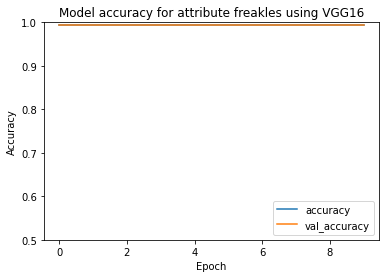

In [ ]:
# Training
history = modelVGG16Freakle.fit(X_trainFreakle, y_trainFreakle, epochs=10, batch_size=512,
                    validation_data=(X_testFreakle, y_testFreakle))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute freakles using VGG16")

test_loss, test_acc = modelVGG16Freakle.evaluate(X_testFreakle,  y_testFreakle, verbose=2)

print(test_acc)

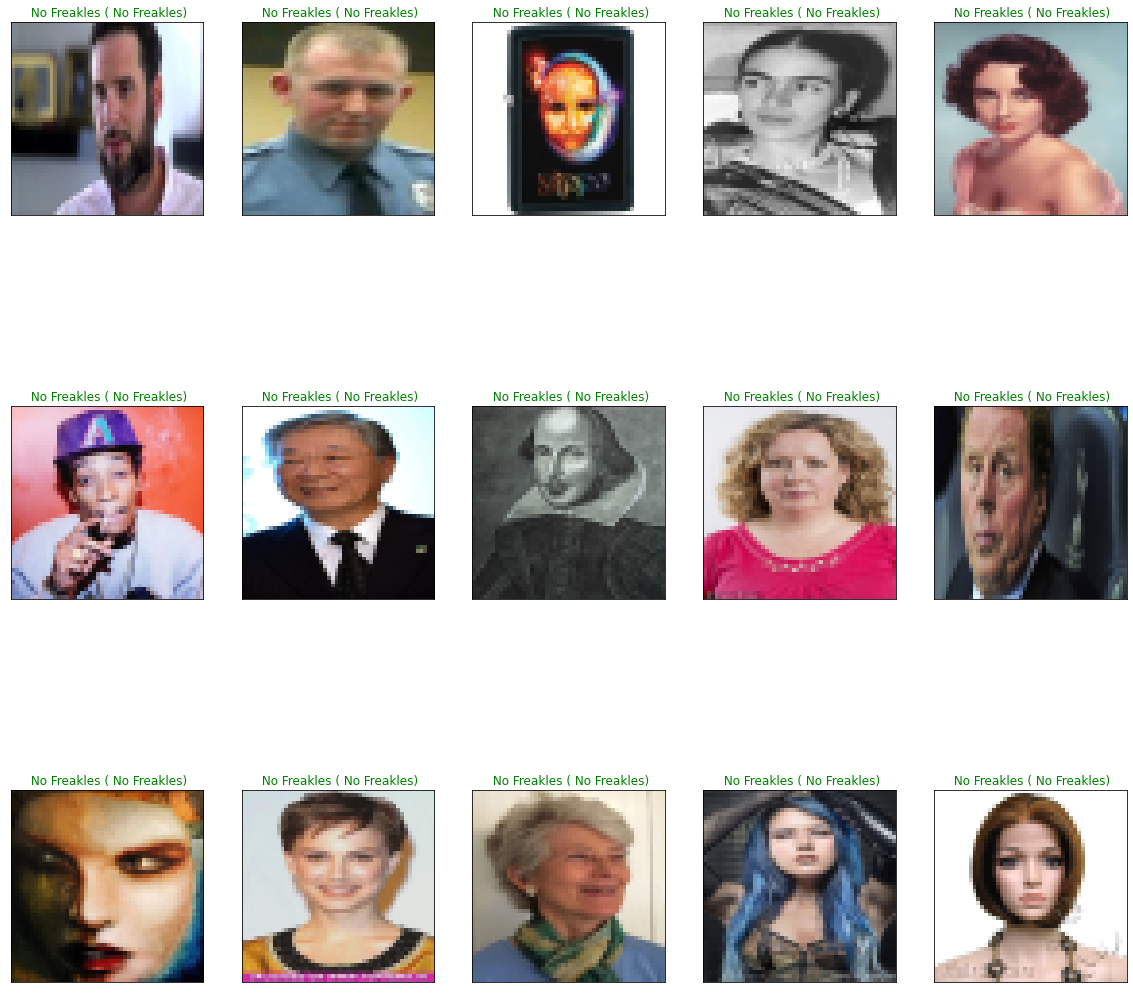

In [ ]:
import pdb
y_hatFreakle = modelVGG16Freakle.predict(X_testFreakle)
# X_trainWrinkle, X_testWrinkle, y_trainWrinkle, y_testWrinkle
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testFreakle.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testFreakle[index]))
    predict_index = np.argmax(y_hatFreakle[index])
    true_index = y_testFreakle[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesFreakles[predict_index], 
                                  class_namesFreakles[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Training attribute Freakles with Resnet50

Epoch 1/10
7/7 [==============================] - 20s 1s/step - loss: 0.4360 - accuracy: 0.8226 - val_loss: 0.1146 - val_accuracy: 0.9937
Epoch 2/10
7/7 [==============================] - 6s 800ms/step - loss: 0.0289 - accuracy: 0.9936 - val_loss: 0.1840 - val_accuracy: 0.9937
Epoch 3/10
7/7 [==============================] - 6s 800ms/step - loss: 0.0055 - accuracy: 0.9975 - val_loss: 0.1876 - val_accuracy: 0.9937
Epoch 4/10
7/7 [==============================] - 6s 801ms/step - loss: 9.3815e-04 - accuracy: 0.9996 - val_loss: 0.1853 - val_accuracy: 0.9937
Epoch 5/10
7/7 [==============================] - 6s 805ms/step - loss: 2.7743e-04 - accuracy: 1.0000 - val_loss: 0.1904 - val_accuracy: 0.9937
Epoch 6/10
7/7 [==============================] - 6s 805ms/step - loss: 2.7106e-04 - accuracy: 1.0000 - val_loss: 0.1993 - val_accuracy: 0.9937
Epoch 7/10
7/7 [==============================] - 6s 804ms/step - loss: 2.0239e-04 - accuracy: 1.0000 - val_loss: 0.2111 - val_accuracy: 0.9937
Epoch 

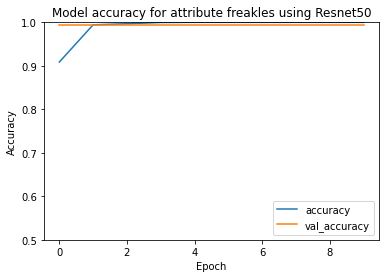

In [ ]:
# Training
history = modelResNetFreakle.fit(X_trainFreakle, y_trainFreakle, epochs=10, batch_size=512,
                    validation_data=(X_testFreakle, y_testFreakle))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute freakles using Resnet50")

test_loss, test_acc = modelResNetFreakle.evaluate(X_testFreakle,  y_testFreakle, verbose=2)

print(test_acc)

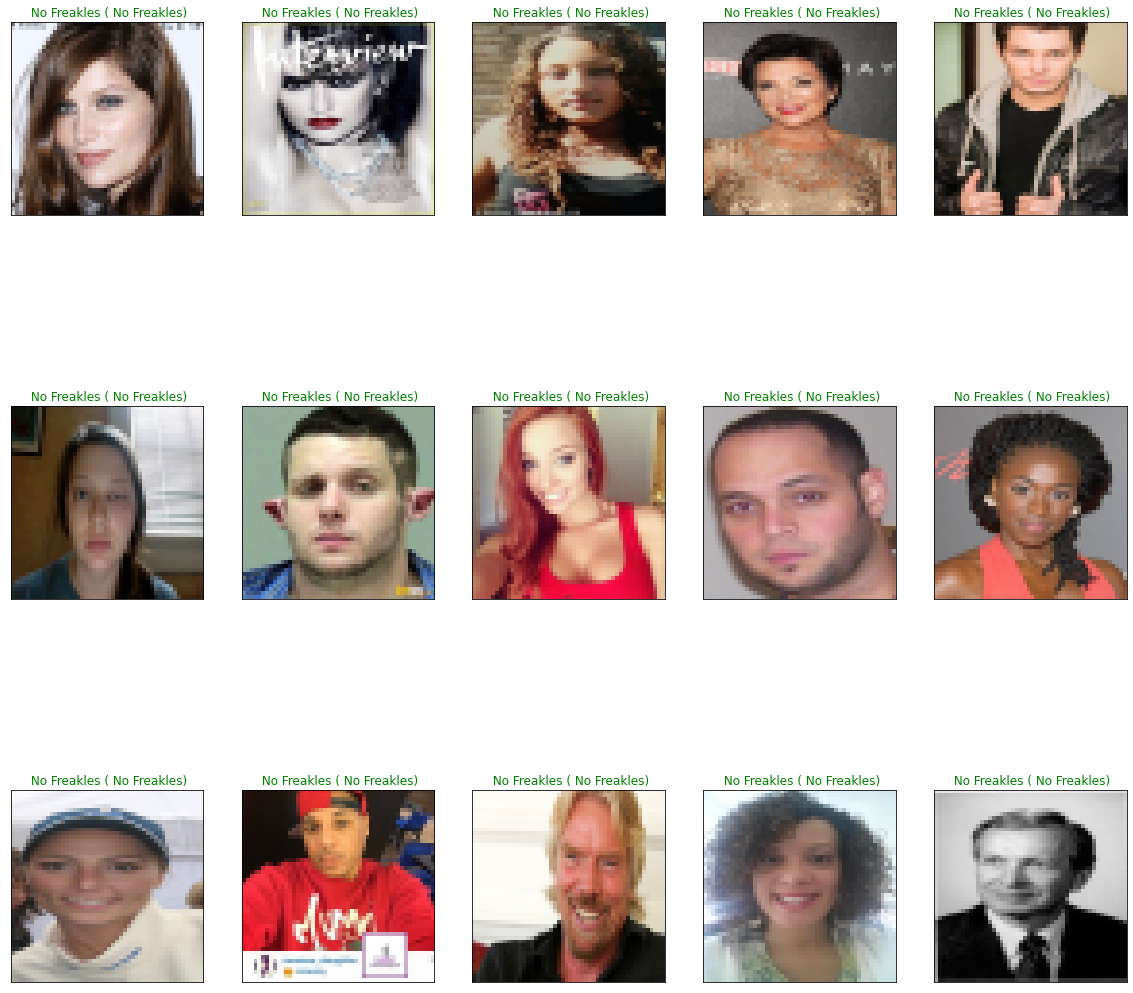

In [ ]:
import pdb
y_hatFreakle1 = modelResNetFreakle.predict(X_testFreakle)
# X_trainWrinkle, X_testWrinkle, y_trainWrinkle, y_testWrinkle
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testFreakle.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testFreakle[index]))
    predict_index = np.argmax(y_hatFreakle1[index])
    true_index = y_testFreakle[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesFreakles[predict_index], 
                                  class_namesFreakles[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute Glass with VGG16

In [ ]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set
X_trainGlass, X_testGlass, y_trainGlass, y_testGlass = train_test_split(image_lst, Glasses1 , test_size=0.2, stratify=Glasses1, random_state=42)

In [ ]:
X_trainGlass = np.array(X_trainGlass)/255.0
X_testGlass = np.array(X_testGlass)/255.0

Epoch 1/10
7/7 [==============================] - 6s 761ms/step - loss: 0.7795 - accuracy: 0.6026 - val_loss: 0.3407 - val_accuracy: 0.9100
Epoch 2/10
7/7 [==============================] - 5s 713ms/step - loss: 0.3426 - accuracy: 0.9097 - val_loss: 0.3382 - val_accuracy: 0.9100
Epoch 3/10
7/7 [==============================] - 5s 713ms/step - loss: 0.3342 - accuracy: 0.9122 - val_loss: 0.3320 - val_accuracy: 0.9100
Epoch 4/10
7/7 [==============================] - 5s 712ms/step - loss: 0.3309 - accuracy: 0.9124 - val_loss: 0.3320 - val_accuracy: 0.9100
Epoch 5/10
7/7 [==============================] - 5s 709ms/step - loss: 0.3346 - accuracy: 0.9085 - val_loss: 0.3325 - val_accuracy: 0.9100
Epoch 6/10
7/7 [==============================] - 5s 713ms/step - loss: 0.3096 - accuracy: 0.9187 - val_loss: 0.3344 - val_accuracy: 0.9100
Epoch 7/10
7/7 [==============================] - 5s 714ms/step - loss: 0.3347 - accuracy: 0.9100 - val_loss: 0.3328 - val_accuracy: 0.9100
Epoch 8/10
7/7 [====

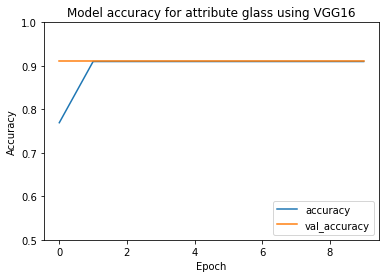

In [ ]:
# Training
history = modelVGG16Glass.fit(X_trainGlass, y_trainGlass, epochs=10, batch_size=512,
                    validation_data=(X_testGlass, y_testGlass))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute glass using VGG16")

test_loss, test_acc = modelVGG16Glass.evaluate(X_testGlass,  y_testGlass, verbose=2)

print(test_acc)

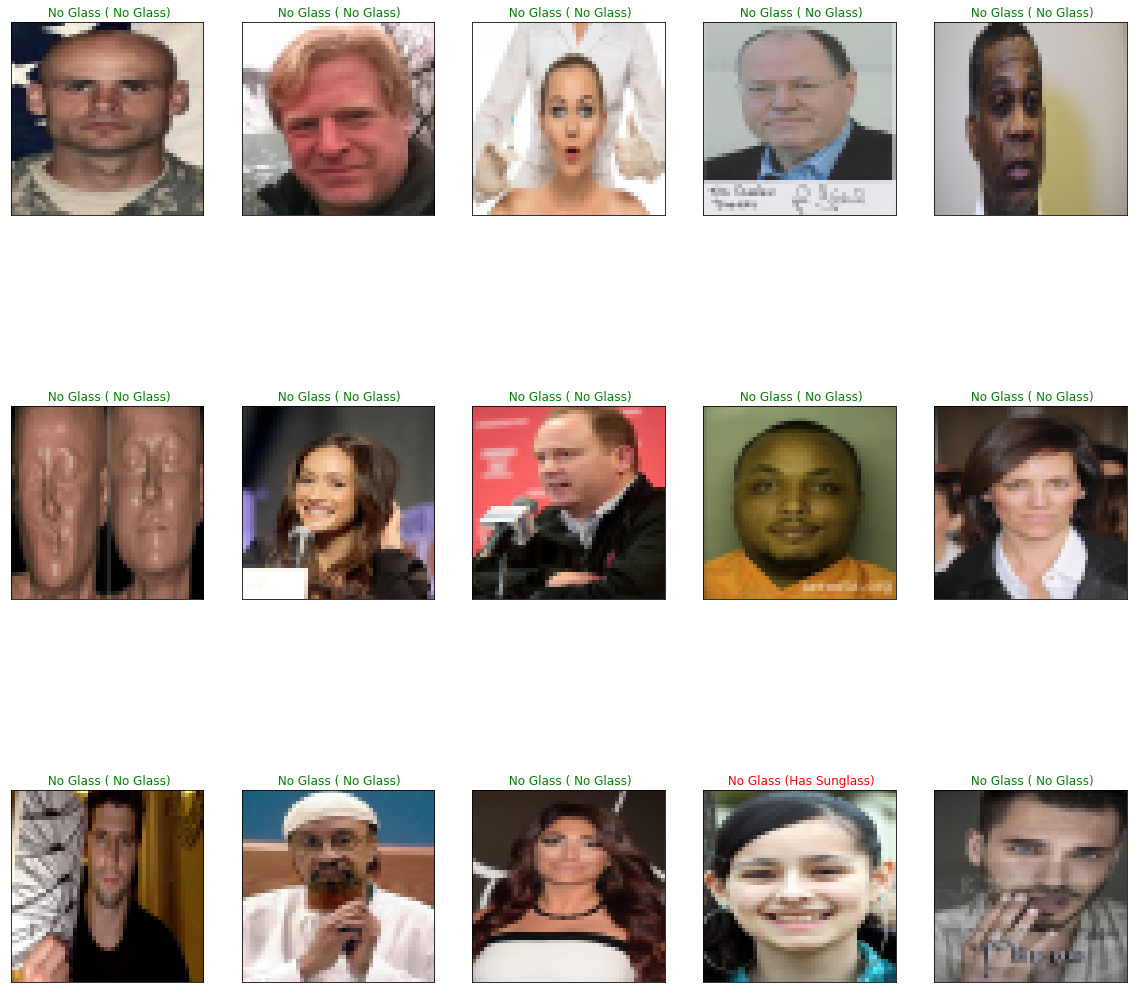

In [ ]:
import pdb
y_hatGlass = modelVGG16Glass.predict(X_testGlass)
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testGlass.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testGlass[index]))
    predict_index = np.argmax(y_hatGlass[index])
    true_index = y_testGlass[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesGlasses[predict_index], 
                                  class_namesGlasses[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute glass with Resnet50

Epoch 1/10
7/7 [==============================] - 13s 991ms/step - loss: 1.0866 - accuracy: 0.6776 - val_loss: 2.5324 - val_accuracy: 0.9100
Epoch 2/10
7/7 [==============================] - 6s 801ms/step - loss: 0.1725 - accuracy: 0.9408 - val_loss: 2.7663 - val_accuracy: 0.9100
Epoch 3/10
7/7 [==============================] - 6s 804ms/step - loss: 0.0432 - accuracy: 0.9936 - val_loss: 2.2006 - val_accuracy: 0.9100
Epoch 4/10
7/7 [==============================] - 6s 802ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 2.1002 - val_accuracy: 0.9100
Epoch 5/10
7/7 [==============================] - 6s 798ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 2.1988 - val_accuracy: 0.9100
Epoch 6/10
7/7 [==============================] - 6s 802ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 2.3247 - val_accuracy: 0.9100
Epoch 7/10
7/7 [==============================] - 6s 803ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 2.4196 - val_accuracy: 0.9100
Epoch 8/10
7/7 [===

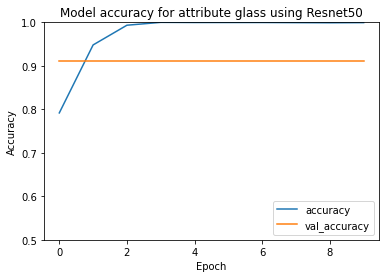

In [ ]:
# Training
history = modelResNetGlass.fit(X_trainGlass, y_trainGlass, epochs=10, batch_size=512,
                    validation_data=(X_testGlass, y_testGlass))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute glass using Resnet50")

test_loss, test_acc = modelResNetGlass.evaluate(X_testGlass,  y_testGlass, verbose=2)

print(test_acc)

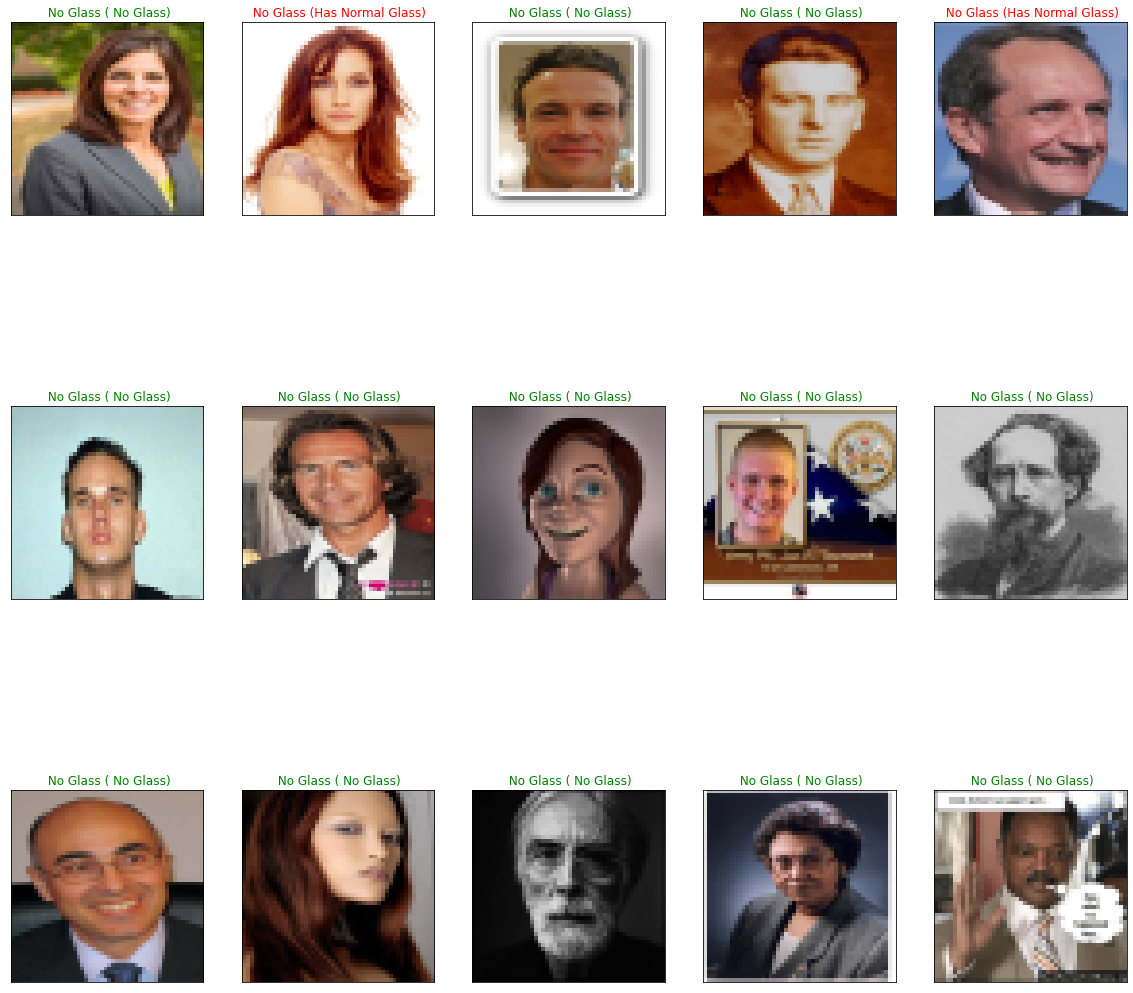

In [ ]:
import pdb
y_hatGlass1 = modelResNetGlass.predict(X_testGlass)
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testGlass.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testGlass[index]))
    predict_index = np.argmax(y_hatGlass1[index])
    true_index = y_testGlass[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesGlasses[predict_index], 
                                  class_namesGlasses[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute hair color with VGG16

In [ ]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set
X_trainHairColor, X_testHairColor, y_trainHairColor, y_testHairColor = train_test_split(image_lst, HairColor1, test_size=0.2, stratify=HairColor1, random_state=42)

In [ ]:
X_trainHairColor = np.array(X_trainHairColor)/255.0
X_testHairColor = np.array(X_testHairColor)/255.0

Epoch 1/10
7/7 [==============================] - 6s 722ms/step - loss: nan - accuracy: 0.1537 - val_loss: nan - val_accuracy: 0.2425
Epoch 2/10
7/7 [==============================] - 5s 677ms/step - loss: nan - accuracy: 0.2413 - val_loss: nan - val_accuracy: 0.2425
Epoch 3/10
7/7 [==============================] - 5s 676ms/step - loss: nan - accuracy: 0.2385 - val_loss: nan - val_accuracy: 0.2425
Epoch 4/10
7/7 [==============================] - 5s 674ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2425
Epoch 5/10
7/7 [==============================] - 5s 677ms/step - loss: nan - accuracy: 0.2496 - val_loss: nan - val_accuracy: 0.2425
Epoch 6/10
7/7 [==============================] - 5s 679ms/step - loss: nan - accuracy: 0.2387 - val_loss: nan - val_accuracy: 0.2425
Epoch 7/10
7/7 [==============================] - 5s 677ms/step - loss: nan - accuracy: 0.2418 - val_loss: nan - val_accuracy: 0.2425
Epoch 8/10
7/7 [==============================] - 5s 675ms/ste

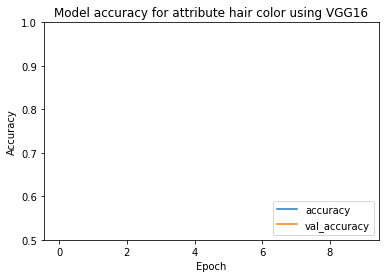

In [ ]:
# Training
history = modelVGG16HairColor.fit(X_trainHairColor, y_trainHairColor, epochs=10, batch_size=512,
                    validation_data=(X_testHairColor, y_testHairColor))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute hair color using VGG16")

test_loss, test_acc = modelVGG16HairColor.evaluate(X_testHairColor,  y_testHairColor, verbose=2)

print(test_acc)

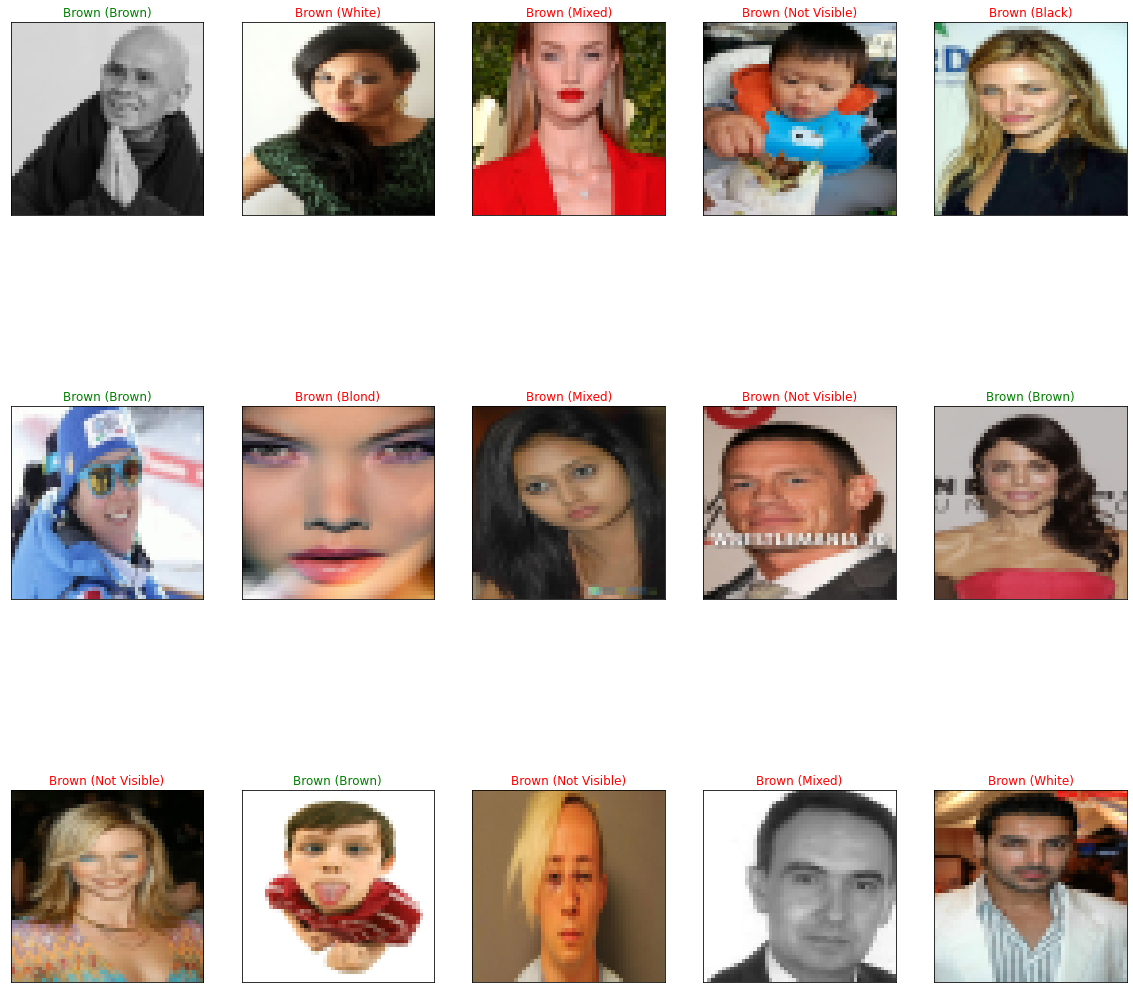

In [ ]:
import pdb
y_hatHairColor = modelVGG16HairColor.predict(X_testHairColor)
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testHairColor.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testHairColor[index]))
    predict_index = np.argmax(y_hatHairColor[index])
    true_index = y_testHairColor[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesHairColor[predict_index], 
                                  class_namesHairColor[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribut Hair color with Resnet50

Epoch 1/10
7/7 [==============================] - 13s 962ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.2425
Epoch 2/10
7/7 [==============================] - 5s 779ms/step - loss: nan - accuracy: 0.2415 - val_loss: nan - val_accuracy: 0.2425
Epoch 3/10
7/7 [==============================] - 5s 782ms/step - loss: nan - accuracy: 0.2432 - val_loss: nan - val_accuracy: 0.2425
Epoch 4/10
7/7 [==============================] - 5s 784ms/step - loss: nan - accuracy: 0.2407 - val_loss: nan - val_accuracy: 0.2425
Epoch 5/10
7/7 [==============================] - 5s 779ms/step - loss: nan - accuracy: 0.2418 - val_loss: nan - val_accuracy: 0.2425
Epoch 6/10
7/7 [==============================] - 5s 780ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2425
Epoch 7/10
7/7 [==============================] - 5s 778ms/step - loss: nan - accuracy: 0.2361 - val_loss: nan - val_accuracy: 0.2425
Epoch 8/10
7/7 [==============================] - 5s 780ms/st

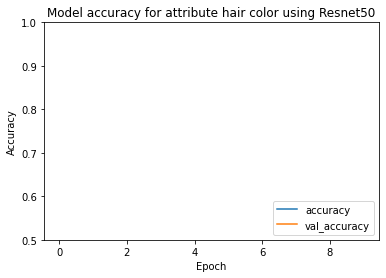

In [ ]:
# Training
history = modelResNetHairColor.fit(X_trainHairColor, y_trainHairColor, epochs=10, batch_size=512,
                    validation_data=(X_testHairColor, y_testHairColor))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute hair color using Resnet50")

test_loss, test_acc = modelResNetHairColor.evaluate(X_testHairColor,  y_testHairColor, verbose=2)

print(test_acc)

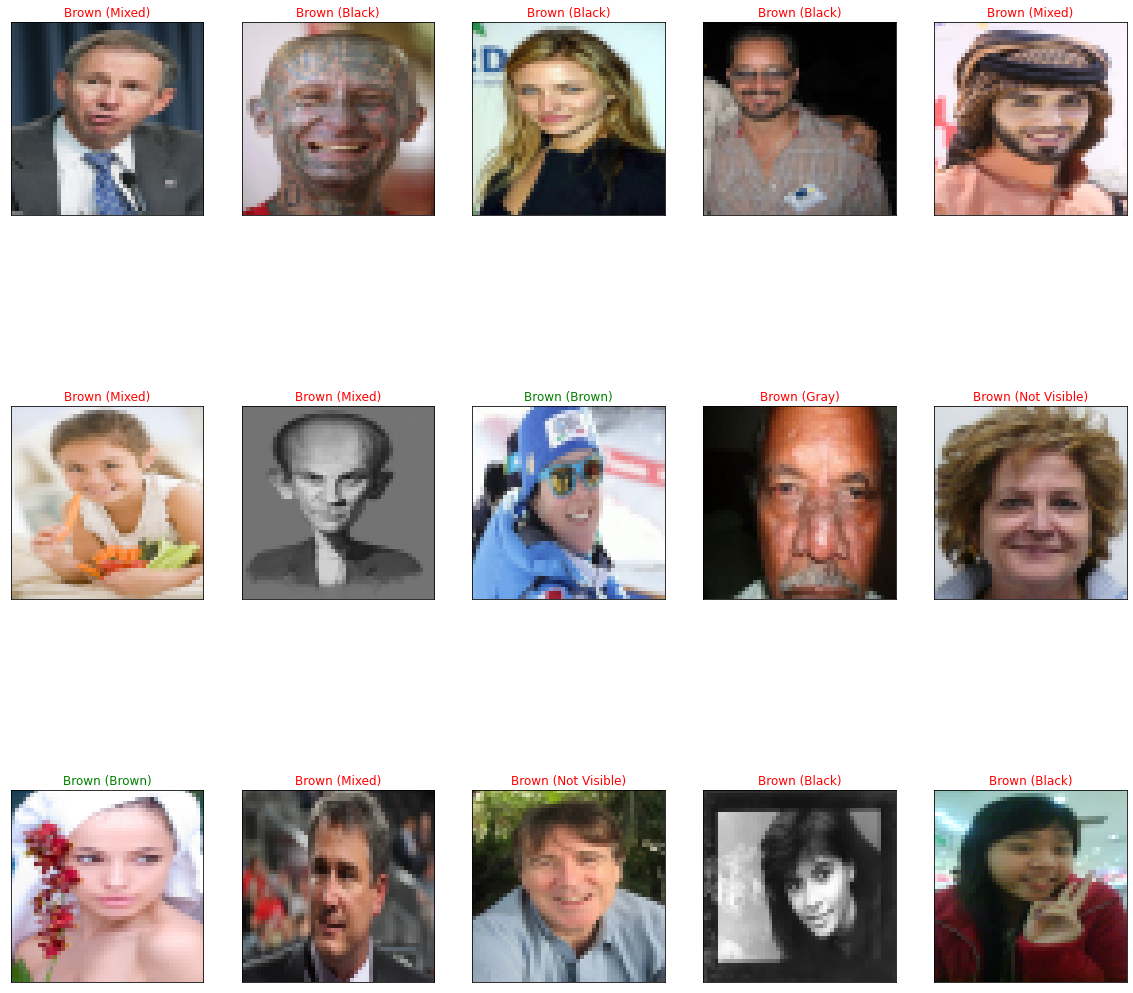

In [ ]:
import pdb
y_hatHairColor1 = modelResNetHairColor.predict(X_testHairColor)
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testHairColor.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testHairColor[index]))
    predict_index = np.argmax(y_hatHairColor1[index])
    true_index = y_testHairColor[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesHairColor[predict_index], 
                                  class_namesHairColor[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute Hair top with VGG16

In [ ]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set
X_trainHairTop, X_testHairTop, y_trainHairTop, y_testHairTop = train_test_split(image_lst, HairTop1, test_size=0.2, stratify=HairTop1, random_state=42)

In [ ]:
X_trainHairTop = np.array(X_trainHairTop)/255.0
X_testHairTop = np.array(X_testHairTop)/255.0

Epoch 1/10
7/7 [==============================] - 6s 722ms/step - loss: 1.3862 - accuracy: 0.4516 - val_loss: 1.3858 - val_accuracy: 0.6187
Epoch 2/10
7/7 [==============================] - 5s 677ms/step - loss: 1.3857 - accuracy: 0.6144 - val_loss: 1.3853 - val_accuracy: 0.6187
Epoch 3/10
7/7 [==============================] - 5s 674ms/step - loss: 1.3852 - accuracy: 0.6166 - val_loss: 1.3848 - val_accuracy: 0.6187
Epoch 4/10
7/7 [==============================] - 5s 677ms/step - loss: 1.3847 - accuracy: 0.6137 - val_loss: 1.3842 - val_accuracy: 0.6187
Epoch 5/10
7/7 [==============================] - 5s 677ms/step - loss: 1.3841 - accuracy: 0.6227 - val_loss: 1.3837 - val_accuracy: 0.6187
Epoch 6/10
7/7 [==============================] - 5s 676ms/step - loss: 1.3837 - accuracy: 0.6143 - val_loss: 1.3832 - val_accuracy: 0.6187
Epoch 7/10
7/7 [==============================] - 5s 676ms/step - loss: 1.3831 - accuracy: 0.6180 - val_loss: 1.3827 - val_accuracy: 0.6187
Epoch 8/10
7/7 [====

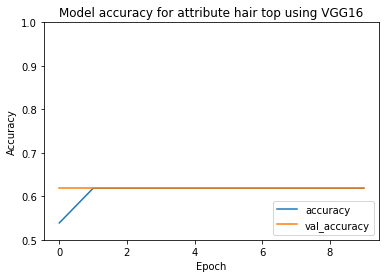

In [ ]:
# Training
history = modelVGG16HairTop.fit(X_trainHairTop, y_trainHairTop, epochs=10, batch_size=512,
                    validation_data=(X_testHairTop, y_testHairTop))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute hair top using VGG16")

test_loss, test_acc = modelVGG16HairTop.evaluate(X_testHairTop,  y_testHairTop, verbose=2)

print(test_acc)

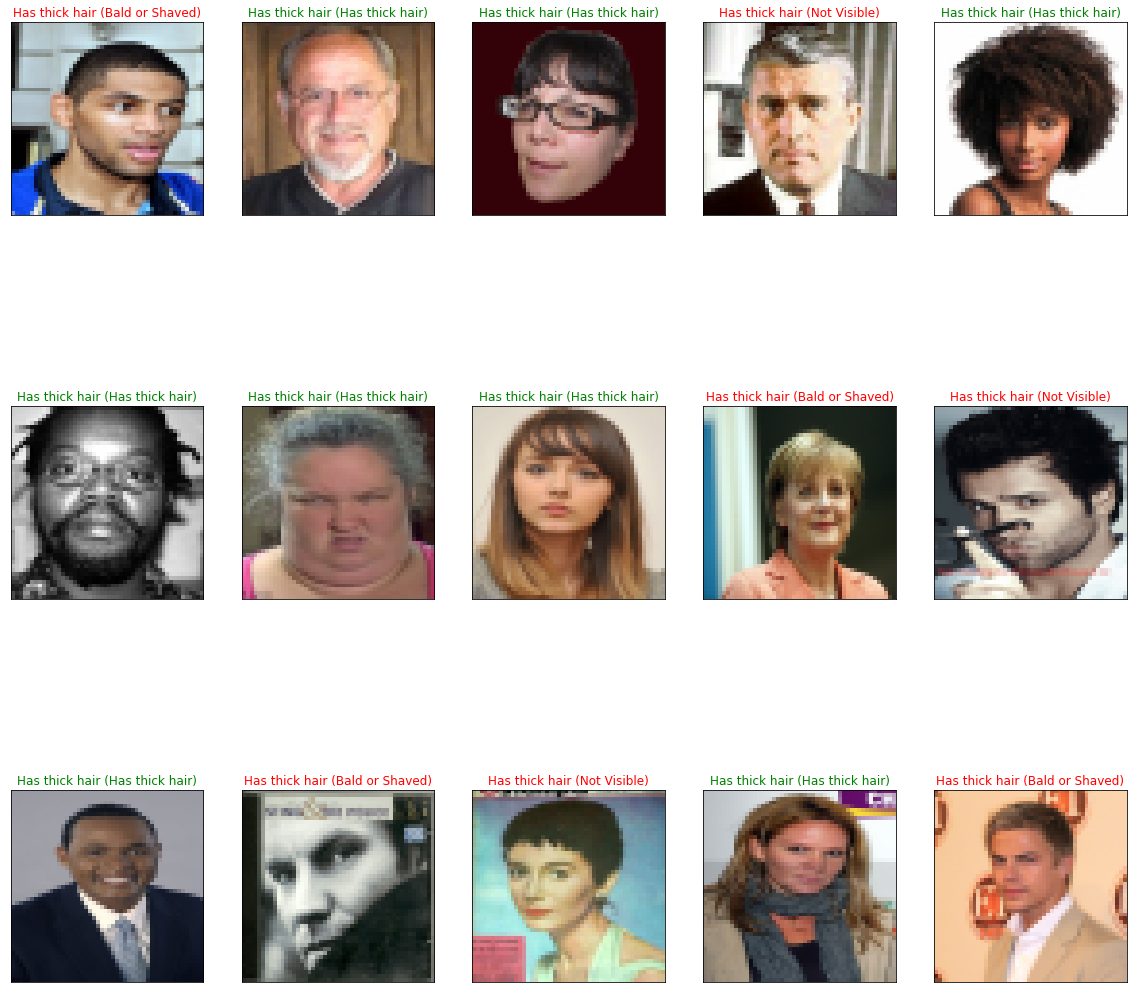

In [ ]:
import pdb
y_hatHairTop = modelVGG16HairTop.predict(X_testHairTop)
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_testHairTop.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_testHairTop[index]))
    predict_index = np.argmax(y_hatHairTop[index])
    true_index = y_testHairTop[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_namesHairTop[predict_index], 
                                  class_namesHairTop[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Training attribute Hair Top with Resnet50

Epoch 1/10
7/7 [==============================] - 13s 960ms/step - loss: 1.3862 - accuracy: 0.4570 - val_loss: nan - val_accuracy: 0.1375
Epoch 2/10
7/7 [==============================] - 5s 780ms/step - loss: 1.3857 - accuracy: 0.6146 - val_loss: nan - val_accuracy: 0.1375
Epoch 3/10
7/7 [==============================] - 5s 779ms/step - loss: 1.3852 - accuracy: 0.6171 - val_loss: nan - val_accuracy: 0.1375
Epoch 4/10
7/7 [==============================] - 5s 778ms/step - loss: 1.3847 - accuracy: 0.6132 - val_loss: nan - val_accuracy: 0.1375
Epoch 5/10
7/7 [==============================] - 5s 779ms/step - loss: 1.3841 - accuracy: 0.6210 - val_loss: nan - val_accuracy: 0.1375
Epoch 6/10
7/7 [==============================] - 5s 780ms/step - loss: 1.3836 - accuracy: 0.6186 - val_loss: nan - val_accuracy: 0.1375
Epoch 7/10
7/7 [==============================] - 5s 778ms/step - loss: 1.3831 - accuracy: 0.6168 - val_loss: nan - val_accuracy: 0.1375
Epoch 8/10
7/7 [========================

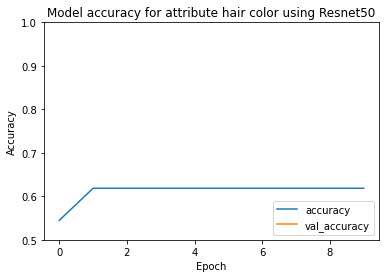

In [ ]:
# Training
history = modelResNetHairTop.fit(X_trainHairTop, y_trainHairTop, epochs=10, batch_size=512,
                    validation_data=(X_testHairTop, y_testHairTop))


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model accuracy for attribute hair color using Resnet50")

test_loss, test_acc = modelResNetHairTop.evaluate(X_testHairTop,  y_testHairTop, verbose=2)

print(test_acc)

In [ ]:
modelVGG16Wrinkle.save("/content/drive/MyDrive/VGG16WrinkleModel.h5")
modelVGG16Wrinkle.save_weights("/content/drive/MyDrive/VGG16WrinkleModel_Weights.h5")
modelVGG16Freakle.save("/content/drive/MyDrive/VGG16FreakleModel.h5")
modelVGG16Freakle.save_weights("/content/drive/MyDrive/VGG16FreakleModel_Weights.h5")
modelVGG16Glass.save("/content/drive/MyDrive/VGG16GlassModel.h5")
modelVGG16Glass.save_weights("/content/drive/MyDrive/VGG16GlassModel_Weights.h5")
modelVGG16HairColor.save("/content/drive/MyDrive/VGG16HairColorModel.h5")
modelVGG16HairColor.save_weights("/content/drive/MyDrive/VGG16HairColorModel_Weights.h5")
modelVGG16HairTop.save("/content/drive/MyDrive/VGG16HairTopModel.h5")
modelVGG16HairTop.save_weights("/content/drive/MyDrive/VGG16HairTopModel_Weights.h5")

# Data Augmentation

Epoch 1/10
12/12 [==============================] - 21s 963ms/step - loss: 0.9479 - accuracy: 0.7111 - val_loss: 0.6104 - val_accuracy: 0.7937
Epoch 2/10
12/12 [==============================] - 7s 571ms/step - loss: 0.6555 - accuracy: 0.7431 - val_loss: 0.5858 - val_accuracy: 0.8200
Epoch 3/10
12/12 [==============================] - 7s 570ms/step - loss: 0.5599 - accuracy: 0.7891 - val_loss: 0.5063 - val_accuracy: 0.8200
Epoch 4/10
12/12 [==============================] - 7s 572ms/step - loss: 0.4428 - accuracy: 0.8339 - val_loss: 0.4757 - val_accuracy: 0.8200
Epoch 5/10
12/12 [==============================] - 7s 573ms/step - loss: 0.4116 - accuracy: 0.8325 - val_loss: 0.8046 - val_accuracy: 0.8200
Epoch 6/10
12/12 [==============================] - 7s 575ms/step - loss: 0.3313 - accuracy: 0.8770 - val_loss: 1.0316 - val_accuracy: 0.8200
Epoch 7/10
12/12 [==============================] - 7s 575ms/step - loss: 0.3105 - accuracy: 0.8830 - val_loss: 0.5181 - val_accuracy: 0.8200
Epoch

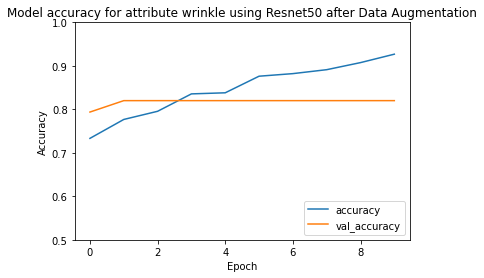

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Model
from tensorflow import keras



# for specific details on the preprocessing layers have a look here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = keras.Sequential(
    [   
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (50, 50, 3)
classes = 2


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Add the rest of the model
model = keras.applications.ResNet50(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)

# add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(2, activation='softmax')(flat1)



# define new model
model = Model(inputs=inputs, outputs= outputs)


model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256


# train the network
history = model.fit(X_trainWrinkle, y_trainWrinkle, shuffle= True,
	validation_data=(X_testWrinkle, y_testWrinkle), steps_per_epoch=len(X_trainWrinkle) // BS,
	epochs=EPOCHS)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("Model accuracy for attribute wrinkle using Resnet50 after Data Augmentation")

plt.legend(loc='lower right')

In [ ]:
model.save("/content/drive/MyDrive/Wrinkle_Model_Data_Augmentation.h5")
model.save_weights("/content/drive/MyDrive/Wrinkle_Model_Data_Augmentation_Weights.h5")